In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [11]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [12]:
le_geo = LabelEncoder()
le_gender = LabelEncoder()
df["Geography"] = le_geo.fit_transform(df["Geography"])
df["Gender"] = le_gender.fit_transform(df["Gender"])


In [13]:
X = df.drop("Exited", axis=1)  # all input columns
y = df["Exited"]               # output column (0 = stayed, 1 = left)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
mlp = MLPClassifier(hidden_layer_sizes=(32, 16), activation="relu",
                    solver="adam", max_iter=300, random_state=42)


In [17]:
mlp.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=300, random_state=42)

In [19]:
# Step 9: Make predictions
y_pred = mlp.predict(X_test)

In [20]:
# Step 10: Evaluate model
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc, 3))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 0.857
Confusion Matrix:
 [[1506   87]
 [ 199  208]]


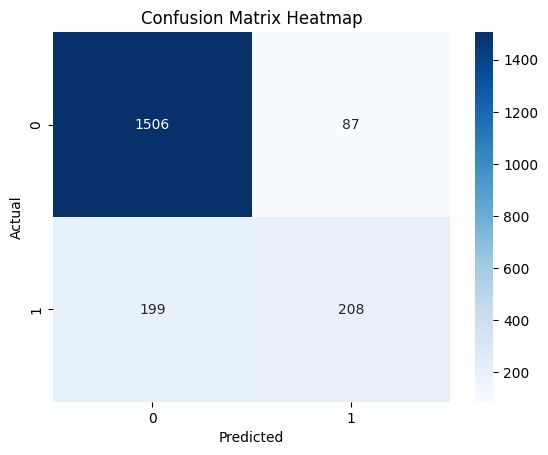

In [22]:
# Step 11: Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()